In [79]:
import pandas as pd
import networkx as nx
import glob
from networkx.algorithms import community
from datetime import datetime
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [87]:
str(datetime.today())

'2021-01-05 18:04:41.265344'

In [40]:
networks = glob.glob('../data/*.txt')
for file in networks:
    print(file)
    

fbEdges = open(networks[0],'r').readlines()[4:]
fbEdges = list(map(lambda x:list(map(lambda y: int(y),x.rstrip().split())), fbEdges))

size_times = []

../data/facebook_combined.txt
../data/soc-Slashdot0811.txt


## We make networks from some anonymized facebook data taken from the Stanford Network Analysis Project (http://snap.stanford.edu/) and we run a simple community detection algorithm on it. We use a variety of sizes for subnetworks to demonstrate duration for running the algorithm, and how it gets sped up on larger RAM.

### Facebook:
#### We time the algorithm with some increasing subnetworks and we plot the results.

##### Network 1

Time for graph 0 in seconds is: 2
Time for graph 1 in seconds is: 0
Time for graph 2 in seconds is: 2
Time for graph 3 in seconds is: 7
Time for graph 4 in seconds is: 24
Time for graph 5 in seconds is: 33
Time for graph 6 in seconds is: 155
Time for graph 7 in seconds is: 138
Time for graph 8 in seconds is: 272
Time for graph 9 in seconds is: 275
Time for graph 10 in seconds is: 297
Time for graph 11 in seconds is: 308


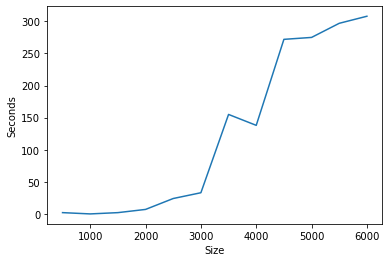

In [91]:
size_times = []
Size = 500
Iterations = 12

for i in range(Iterations):
    size = (i+1)*Size
    fb = nx.Graph()
    fb.add_edges_from(fbEdges[:size])
    start = datetime.now()
    community_generatorFB = community.girvan_newman(fb)
    _ = next(community_generatorFB)
    finish = datetime.now()
    time = (finish-start).seconds
    print('Time for graph '+str(i)+' in seconds is: '+str(time))
    size_times.append((size,time))
    
records = pd.DataFrame(size_times,columns = ['Size','Seconds'])

_ = sns.lineplot(data=records, x="Size", y="Seconds")
filename = '../Size by Time '+str(datetime.today())+'.png'
plt.savefig(filename)
